## CHEST X-RAY PNEUMONIA

#### Import required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

## TRAIN

#### Load Pneumonia class images

In [2]:
train_x=[]

path=r'xray\train\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [3]:
a=len(train_x)
train_y=np.zeros(a)

#### Load COVID class images

In [4]:
path=r'xray\train\covid1000n\*'


for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [5]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

#### Load Normal class images

In [6]:
path=r'xray\train\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [7]:
c=len(train_x)
trainyy=np.concatenate((trainy,np.full(c-b, 2.)))

#### Load generated Pneumonia class images

In [8]:
path=r'xray\NCGAN\PNEUMONIA\*.png'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [9]:
d=len(train_x)
trainyy=np.concatenate((trainyy,np.zeros(d-c)))

#### Load generated COVID class images

In [10]:
path=r'xray\NCGAN\COVID\*.png'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [11]:
e=len(train_x)
trainyy=np.concatenate((trainyy,np.ones(e-d)))

#### Load generated Normal class images

In [12]:
path=r'xray\NCGAN\NORMAL\*.png'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [13]:
f=len(train_x)
trainyy=np.concatenate((trainyy,np.full(f-e, 2.)))

## TEST

#### Load Pneumonia class images

In [14]:
test_x=[]

path=r'xray\test\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [15]:
a=len(test_x)
test_y=np.zeros(a)

#### Load COVID class images

In [16]:
path=r'xray\test\covid1000\*'


for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [17]:
b=len(test_x)
testy=np.concatenate((test_y,np.ones(b-a)))

#### Load Normal class images

In [18]:
path=r'xray\test\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [19]:
c=len(test_x)
testyy=np.concatenate((testy,np.full(c-b, 2.)))

In [20]:
testx = np.stack(test_x) # Converts the list of arrays to a array of arrays

# Train the model and make prediction

In [21]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

#### Split part of train data as validation set

In [22]:
tx,vx,ty,vy=train_test_split(trainx,trainyy)
ty = tf.keras.utils.to_categorical(ty,3)
vy = tf.keras.utils.to_categorical(vy,3)

In [23]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')

    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size = 300, epochs=40,callbacks=[es])

Train on 8211 samples, validate on 2737 samples
Epoch 1/40
8211/8211 [==============================] - 11s 1ms/sample - loss: 8.0863 - accuracy: 0.4010 - val_loss: 1.0799 - val_accuracy: 0.4227
Epoch 2/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.9666 - accuracy: 0.5321 - val_loss: 1.0290 - val_accuracy: 0.4731
Epoch 3/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.7758 - accuracy: 0.6514 - val_loss: 0.8648 - val_accuracy: 0.5214
Epoch 4/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.5488 - accuracy: 0.7709 - val_loss: 0.7097 - val_accuracy: 0.7106
Epoch 5/40
8211/8211 [==============================] - 2s 294us/sample - loss: 0.4779 - accuracy: 0.8115 - val_loss: 0.6292 - val_accuracy: 0.7713
Epoch 6/40
8211/8211 [==============================] - 2s 295us/sample - loss: 0.4142 - accuracy: 0.8390 - val_loss: 0.6121 - val_accuracy: 0.7698
Epoch 7/40
8211/8211 [==============================] - 2s 295us/

#### Make prediction

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

pred=model.predict_classes(testx)
print("Accuracy: "+str(accuracy_score(testyy, pred)))
print('\n')
print(confusion_matrix(testyy, pred))
print('\n')
print(classification_report(testyy, pred))

Accuracy: 0.8871915393654524


[[373   0  17]
 [  7 219   1]
 [ 61  10 163]]


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       390
         1.0       0.96      0.96      0.96       227
         2.0       0.90      0.70      0.79       234

    accuracy                           0.89       851
   macro avg       0.90      0.87      0.88       851
weighted avg       0.89      0.89      0.88       851



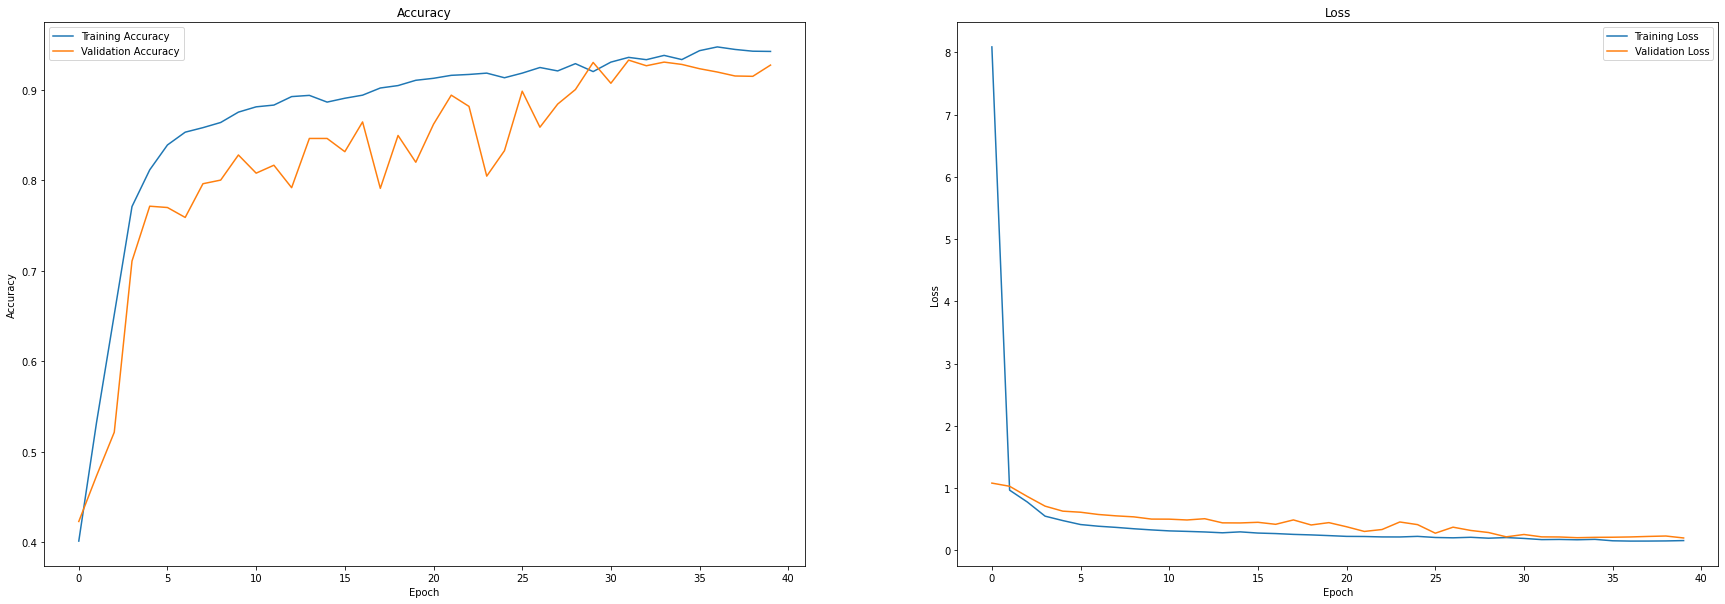

In [26]:
fig=plt.subplots(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

plt.show()

#### Cross Validation

In [126]:
ones = np.zeros(100)
for j in range(100):
    tx,vx,ty,vy=train_test_split(trainx,trainyy)
    ty = tf.keras.utils.to_categorical(ty,3)
    vy = tf.keras.utils.to_categorical(vy,3)
    tf.random.set_seed(1234)
    es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

    model=tf.keras.Sequential(
    [
        layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
        layers.MaxPooling2D(pool_size=(4, 4)),
        layers.Dropout(0.25),
            
        layers.Conv2D(40, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(8, 8)),
        layers.Dropout(0.2),  
    
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(3,activation='softmax')

    
    ])

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
    mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size = 300, epochs=40,callbacks=[es])
    pred=model.predict_classes(testx)
    l=0
    for i in range(len(pred)):
        if pred[i]==testyy[i]:
            l+=1
    ones[j]=l/len(testyy)
    print(ones[j])
    if ones[j]== ones.max():
        onesmax = ones[j]
        otxmax=tx
        ovxmax=vx
        otymax=ty
        ovymax=vy

Train on 8211 samples, validate on 2737 samples
Epoch 1/40
8211/8211 [==============================] - 3s 366us/sample - loss: 8.2073 - accuracy: 0.3958 - val_loss: 1.0858 - val_accuracy: 0.4556
Epoch 2/40
8211/8211 [==============================] - 2s 304us/sample - loss: 0.9646 - accuracy: 0.5346 - val_loss: 0.9942 - val_accuracy: 0.5276
Epoch 3/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.8061 - accuracy: 0.6265 - val_loss: 0.8780 - val_accuracy: 0.5996
Epoch 4/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.6041 - accuracy: 0.7572 - val_loss: 0.7499 - val_accuracy: 0.7475
Epoch 5/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.5058 - accuracy: 0.7947 - val_loss: 0.6477 - val_accuracy: 0.7837
Epoch 6/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.4714 - accuracy: 0.8112 - val_loss: 0.5763 - val_accuracy: 0.7943
Epoch 7/40
8211/8211 [==============================] - 3s 305us

Epoch 30/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1943 - accuracy: 0.9290 - val_loss: 0.1994 - val_accuracy: 0.9408
Epoch 31/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1771 - accuracy: 0.9348 - val_loss: 0.2103 - val_accuracy: 0.9236
Epoch 32/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1771 - accuracy: 0.9327 - val_loss: 0.2356 - val_accuracy: 0.9145
Epoch 33/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1649 - accuracy: 0.9372 - val_loss: 0.1995 - val_accuracy: 0.9302
Epoch 34/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1608 - accuracy: 0.9383 - val_loss: 0.1976 - val_accuracy: 0.9284
Epoch 35/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1614 - accuracy: 0.9395 - val_loss: 0.2125 - val_accuracy: 0.9244
Epoch 36/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.1545 - accuracy: 0.9441

Epoch 19/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2503 - accuracy: 0.9059 - val_loss: 0.4422 - val_accuracy: 0.8235
Epoch 20/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2576 - accuracy: 0.8996 - val_loss: 0.4907 - val_accuracy: 0.7771
Epoch 21/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.2410 - accuracy: 0.9127 - val_loss: 0.3028 - val_accuracy: 0.8871
Epoch 22/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2373 - accuracy: 0.9096 - val_loss: 0.3895 - val_accuracy: 0.8513
Epoch 23/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2187 - accuracy: 0.9213 - val_loss: 0.3701 - val_accuracy: 0.8615
Epoch 24/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2089 - accuracy: 0.9232 - val_loss: 0.3727 - val_accuracy: 0.8378
Epoch 25/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2182 - accuracy: 0.9206

8211/8211 [==============================] - 3s 306us/sample - loss: 0.4260 - accuracy: 0.8299 - val_loss: 0.6366 - val_accuracy: 0.6927
Epoch 8/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3754 - accuracy: 0.8560 - val_loss: 0.5190 - val_accuracy: 0.7976
Epoch 9/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3466 - accuracy: 0.8680 - val_loss: 0.5047 - val_accuracy: 0.8053
Epoch 10/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3272 - accuracy: 0.8759 - val_loss: 0.4451 - val_accuracy: 0.8352
Epoch 11/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.3200 - accuracy: 0.8808 - val_loss: 0.4013 - val_accuracy: 0.8564
Epoch 12/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2991 - accuracy: 0.8860 - val_loss: 0.4170 - val_accuracy: 0.8370
Epoch 13/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3008 - accuracy: 0.8856 - val_loss: 0

Epoch 22/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2421 - accuracy: 0.9071 - val_loss: 0.2857 - val_accuracy: 0.9028
Epoch 23/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2252 - accuracy: 0.9143 - val_loss: 0.2740 - val_accuracy: 0.9017
Epoch 24/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2084 - accuracy: 0.9228 - val_loss: 0.2603 - val_accuracy: 0.9109
Epoch 25/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2179 - accuracy: 0.9160 - val_loss: 0.2617 - val_accuracy: 0.9024
Epoch 26/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2032 - accuracy: 0.9245 - val_loss: 0.2597 - val_accuracy: 0.9090
Epoch 27/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1997 - accuracy: 0.9272 - val_loss: 0.3369 - val_accuracy: 0.8637
Epoch 28/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2044 - accuracy: 0.9210

8211/8211 [==============================] - 3s 305us/sample - loss: 0.3385 - accuracy: 0.8715 - val_loss: 0.5707 - val_accuracy: 0.7442
Epoch 11/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3284 - accuracy: 0.8724 - val_loss: 0.4144 - val_accuracy: 0.8418
Epoch 12/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3016 - accuracy: 0.8848 - val_loss: 0.4315 - val_accuracy: 0.8323
Epoch 13/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2807 - accuracy: 0.8921 - val_loss: 0.4210 - val_accuracy: 0.8356
Epoch 14/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2838 - accuracy: 0.8928 - val_loss: 0.3814 - val_accuracy: 0.8557
Epoch 15/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2922 - accuracy: 0.8865 - val_loss: 0.4757 - val_accuracy: 0.7936
Epoch 16/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2604 - accuracy: 0.9028 - val_loss:

Epoch 25/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2094 - accuracy: 0.9199 - val_loss: 0.2567 - val_accuracy: 0.9204
Epoch 26/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1971 - accuracy: 0.9299 - val_loss: 0.3783 - val_accuracy: 0.8341
Epoch 27/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2083 - accuracy: 0.9222 - val_loss: 0.2298 - val_accuracy: 0.9258
Epoch 28/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1795 - accuracy: 0.9351 - val_loss: 0.2991 - val_accuracy: 0.8845
Epoch 29/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1928 - accuracy: 0.9291 - val_loss: 0.2097 - val_accuracy: 0.9375
Epoch 30/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1806 - accuracy: 0.9323 - val_loss: 0.2588 - val_accuracy: 0.9101
Epoch 31/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1780 - accuracy: 0.9331

8211/8211 [==============================] - 3s 307us/sample - loss: 0.3064 - accuracy: 0.8798 - val_loss: 0.5368 - val_accuracy: 0.7662
Epoch 14/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2834 - accuracy: 0.8933 - val_loss: 0.5466 - val_accuracy: 0.7519
Epoch 15/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2806 - accuracy: 0.8911 - val_loss: 0.4545 - val_accuracy: 0.8279
Epoch 16/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2830 - accuracy: 0.8942 - val_loss: 0.5125 - val_accuracy: 0.7727
Epoch 17/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2686 - accuracy: 0.8978 - val_loss: 0.5053 - val_accuracy: 0.7855
Epoch 18/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2695 - accuracy: 0.9009 - val_loss: 0.4584 - val_accuracy: 0.8049
Epoch 19/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2547 - accuracy: 0.8984 - val_loss:

Epoch 28/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2081 - accuracy: 0.9236 - val_loss: 0.3481 - val_accuracy: 0.8626
Epoch 29/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2034 - accuracy: 0.9216 - val_loss: 0.2367 - val_accuracy: 0.9156
Epoch 30/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1963 - accuracy: 0.9221 - val_loss: 0.2007 - val_accuracy: 0.9273
Epoch 31/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1917 - accuracy: 0.9257 - val_loss: 0.2194 - val_accuracy: 0.9211
Epoch 32/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1777 - accuracy: 0.9334 - val_loss: 0.2525 - val_accuracy: 0.9043
Epoch 33/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1763 - accuracy: 0.9379 - val_loss: 0.2516 - val_accuracy: 0.9035
Epoch 34/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1678 - accuracy: 0.9376

Epoch 17/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2727 - accuracy: 0.8939 - val_loss: 0.4047 - val_accuracy: 0.8392
Epoch 18/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2526 - accuracy: 0.9052 - val_loss: 0.2926 - val_accuracy: 0.9043
Epoch 19/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2601 - accuracy: 0.9014 - val_loss: 0.3378 - val_accuracy: 0.8824
Epoch 20/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2299 - accuracy: 0.9110 - val_loss: 0.2897 - val_accuracy: 0.9003
Epoch 21/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2376 - accuracy: 0.9078 - val_loss: 0.3056 - val_accuracy: 0.8845
Epoch 22/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2266 - accuracy: 0.9143 - val_loss: 0.2770 - val_accuracy: 0.9024
Epoch 23/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2204 - accuracy: 0.9182

8211/8211 [==============================] - 3s 306us/sample - loss: 0.3143 - accuracy: 0.8810 - val_loss: 0.4342 - val_accuracy: 0.8381
Epoch 14/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2827 - accuracy: 0.8901 - val_loss: 0.4204 - val_accuracy: 0.8495
Epoch 15/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2637 - accuracy: 0.8984 - val_loss: 0.4245 - val_accuracy: 0.8228
Epoch 16/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2587 - accuracy: 0.9043 - val_loss: 0.3827 - val_accuracy: 0.8604
Epoch 17/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2481 - accuracy: 0.9059 - val_loss: 0.4460 - val_accuracy: 0.8031
Epoch 18/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2416 - accuracy: 0.9099 - val_loss: 0.4020 - val_accuracy: 0.8349
Epoch 19/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2474 - accuracy: 0.9059 - val_loss:

Epoch 28/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1778 - accuracy: 0.9322 - val_loss: 0.2292 - val_accuracy: 0.9240
Epoch 29/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.1844 - accuracy: 0.9309 - val_loss: 0.2128 - val_accuracy: 0.9346
Epoch 30/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1766 - accuracy: 0.9351 - val_loss: 0.1958 - val_accuracy: 0.9368
Epoch 31/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1821 - accuracy: 0.9327 - val_loss: 0.2007 - val_accuracy: 0.9386
Epoch 32/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1933 - accuracy: 0.9263 - val_loss: 0.2257 - val_accuracy: 0.9306
Epoch 33/40
8211/8211 [==============================] - 2s 304us/sample - loss: 0.1812 - accuracy: 0.9302 - val_loss: 0.2025 - val_accuracy: 0.9299
Epoch 34/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1691 - accuracy: 0.9362

Epoch 17/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2697 - accuracy: 0.8995 - val_loss: 0.3680 - val_accuracy: 0.8813
Epoch 18/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2465 - accuracy: 0.9085 - val_loss: 0.4286 - val_accuracy: 0.8297
Epoch 19/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2338 - accuracy: 0.9118 - val_loss: 0.3445 - val_accuracy: 0.8710
Epoch 20/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2236 - accuracy: 0.9158 - val_loss: 0.4004 - val_accuracy: 0.8465
Epoch 21/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2303 - accuracy: 0.9141 - val_loss: 0.4131 - val_accuracy: 0.8341
Epoch 22/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2179 - accuracy: 0.9182 - val_loss: 0.3561 - val_accuracy: 0.8626
Epoch 23/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2068 - accuracy: 0.9239

8211/8211 [==============================] - 3s 306us/sample - loss: 0.5446 - accuracy: 0.7793 - val_loss: 0.5630 - val_accuracy: 0.8060
Epoch 6/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.4523 - accuracy: 0.8255 - val_loss: 0.5346 - val_accuracy: 0.8060
Epoch 7/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.4034 - accuracy: 0.8424 - val_loss: 0.5435 - val_accuracy: 0.7848
Epoch 8/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3891 - accuracy: 0.8490 - val_loss: 0.5614 - val_accuracy: 0.7651
Epoch 9/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3685 - accuracy: 0.8543 - val_loss: 0.5934 - val_accuracy: 0.7413
Epoch 10/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3440 - accuracy: 0.8670 - val_loss: 0.4865 - val_accuracy: 0.8089
Epoch 11/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3471 - accuracy: 0.8681 - val_loss: 0.4

Epoch 20/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2478 - accuracy: 0.9067 - val_loss: 0.3363 - val_accuracy: 0.8754
Epoch 21/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2486 - accuracy: 0.9063 - val_loss: 0.3536 - val_accuracy: 0.8659
Epoch 22/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2292 - accuracy: 0.9130 - val_loss: 0.2818 - val_accuracy: 0.8922
Epoch 23/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2493 - accuracy: 0.9031 - val_loss: 0.2741 - val_accuracy: 0.9101
Epoch 24/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2511 - accuracy: 0.9005 - val_loss: 0.2768 - val_accuracy: 0.8951
Epoch 25/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2200 - accuracy: 0.9193 - val_loss: 0.3041 - val_accuracy: 0.8802
Epoch 26/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2097 - accuracy: 0.9204

8211/8211 [==============================] - 3s 309us/sample - loss: 0.2886 - accuracy: 0.8893 - val_loss: 0.4991 - val_accuracy: 0.7972
Epoch 15/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2861 - accuracy: 0.8932 - val_loss: 0.4763 - val_accuracy: 0.8418
Epoch 16/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2874 - accuracy: 0.8900 - val_loss: 0.4541 - val_accuracy: 0.8243
Epoch 17/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2587 - accuracy: 0.9007 - val_loss: 0.3972 - val_accuracy: 0.8666
Epoch 18/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2548 - accuracy: 0.9027 - val_loss: 0.4468 - val_accuracy: 0.8330
Epoch 19/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2443 - accuracy: 0.9070 - val_loss: 0.4460 - val_accuracy: 0.8407
Epoch 20/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2511 - accuracy: 0.9020 - val_loss:

Epoch 29/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2156 - accuracy: 0.9167 - val_loss: 0.2616 - val_accuracy: 0.9189
Epoch 30/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2019 - accuracy: 0.9240 - val_loss: 0.2116 - val_accuracy: 0.9328
Epoch 31/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1868 - accuracy: 0.9306 - val_loss: 0.2244 - val_accuracy: 0.9291
Epoch 32/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1759 - accuracy: 0.9353 - val_loss: 0.2129 - val_accuracy: 0.9328
Epoch 33/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1906 - accuracy: 0.9269 - val_loss: 0.2642 - val_accuracy: 0.9035
Epoch 34/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1880 - accuracy: 0.9266 - val_loss: 0.2265 - val_accuracy: 0.9138
Epoch 35/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1861 - accuracy: 0.9303

Epoch 18/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2353 - accuracy: 0.9099 - val_loss: 0.3801 - val_accuracy: 0.8666
Epoch 19/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2172 - accuracy: 0.9211 - val_loss: 0.3294 - val_accuracy: 0.8893
Epoch 20/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2093 - accuracy: 0.9196 - val_loss: 0.3546 - val_accuracy: 0.8743
Epoch 21/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2262 - accuracy: 0.9135 - val_loss: 0.3828 - val_accuracy: 0.8787
Epoch 22/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1962 - accuracy: 0.9273 - val_loss: 0.3412 - val_accuracy: 0.8798
Epoch 23/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1841 - accuracy: 0.9324 - val_loss: 0.4400 - val_accuracy: 0.8254
Epoch 24/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2004 - accuracy: 0.9277

8211/8211 [==============================] - 3s 308us/sample - loss: 0.2817 - accuracy: 0.8961 - val_loss: 0.4238 - val_accuracy: 0.8392
Epoch 15/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2886 - accuracy: 0.8933 - val_loss: 0.4375 - val_accuracy: 0.8370
Epoch 16/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2847 - accuracy: 0.8901 - val_loss: 0.4315 - val_accuracy: 0.8385
Epoch 17/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2816 - accuracy: 0.8895 - val_loss: 0.4295 - val_accuracy: 0.8254
Epoch 18/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2620 - accuracy: 0.9003 - val_loss: 0.4398 - val_accuracy: 0.8308
Epoch 19/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2520 - accuracy: 0.9067 - val_loss: 0.3968 - val_accuracy: 0.8601
Epoch 20/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2424 - accuracy: 0.9071 - val_loss:

Epoch 29/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1837 - accuracy: 0.9327 - val_loss: 0.2070 - val_accuracy: 0.9361
Epoch 30/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1895 - accuracy: 0.9264 - val_loss: 0.1974 - val_accuracy: 0.9361
Epoch 31/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1762 - accuracy: 0.9340 - val_loss: 0.1996 - val_accuracy: 0.9335
Epoch 32/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1693 - accuracy: 0.9355 - val_loss: 0.1846 - val_accuracy: 0.9397
Epoch 33/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1757 - accuracy: 0.9319 - val_loss: 0.1749 - val_accuracy: 0.9430
Epoch 34/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1612 - accuracy: 0.9408 - val_loss: 0.2059 - val_accuracy: 0.9258
Epoch 35/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1606 - accuracy: 0.9430

Epoch 18/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2407 - accuracy: 0.9078 - val_loss: 0.3478 - val_accuracy: 0.8710
Epoch 19/40
8211/8211 [==============================] - 3s 305us/sample - loss: 0.2325 - accuracy: 0.9127 - val_loss: 0.4476 - val_accuracy: 0.8005
Epoch 20/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2351 - accuracy: 0.9091 - val_loss: 0.3128 - val_accuracy: 0.8871
Epoch 21/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2237 - accuracy: 0.9126 - val_loss: 0.3323 - val_accuracy: 0.8710
Epoch 22/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2131 - accuracy: 0.9234 - val_loss: 0.2695 - val_accuracy: 0.9127
Epoch 23/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2174 - accuracy: 0.9202 - val_loss: 0.2530 - val_accuracy: 0.9233
Epoch 24/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2039 - accuracy: 0.9240

8211/8211 [==============================] - 3s 307us/sample - loss: 0.4783 - accuracy: 0.8104 - val_loss: 0.4966 - val_accuracy: 0.8400
Epoch 7/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.4237 - accuracy: 0.8313 - val_loss: 0.4975 - val_accuracy: 0.8502
Epoch 8/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.3956 - accuracy: 0.8445 - val_loss: 0.4343 - val_accuracy: 0.8451
Epoch 9/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3609 - accuracy: 0.8626 - val_loss: 0.4405 - val_accuracy: 0.8232
Epoch 10/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3488 - accuracy: 0.8654 - val_loss: 0.4567 - val_accuracy: 0.8319
Epoch 11/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.3694 - accuracy: 0.8548 - val_loss: 0.3900 - val_accuracy: 0.8648
Epoch 12/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3587 - accuracy: 0.8609 - val_loss: 0.

Epoch 21/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2183 - accuracy: 0.9179 - val_loss: 0.3607 - val_accuracy: 0.8685
Epoch 22/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2181 - accuracy: 0.9162 - val_loss: 0.3485 - val_accuracy: 0.8732
Epoch 23/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2182 - accuracy: 0.9157 - val_loss: 0.2726 - val_accuracy: 0.9101
Epoch 24/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2156 - accuracy: 0.9193 - val_loss: 0.3419 - val_accuracy: 0.8666
Epoch 25/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2188 - accuracy: 0.9188 - val_loss: 0.2954 - val_accuracy: 0.8929
Epoch 26/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1966 - accuracy: 0.9270 - val_loss: 0.2814 - val_accuracy: 0.8937
Epoch 27/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1854 - accuracy: 0.9323

8211/8211 [==============================] - 3s 306us/sample - loss: 0.2629 - accuracy: 0.8994 - val_loss: 0.3752 - val_accuracy: 0.8794
Epoch 18/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2554 - accuracy: 0.9038 - val_loss: 0.3411 - val_accuracy: 0.8970
Epoch 19/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2513 - accuracy: 0.9067 - val_loss: 0.3478 - val_accuracy: 0.8845
Epoch 20/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2373 - accuracy: 0.9132 - val_loss: 0.3487 - val_accuracy: 0.8904
Epoch 21/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2221 - accuracy: 0.9165 - val_loss: 0.2977 - val_accuracy: 0.9039
Epoch 22/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2317 - accuracy: 0.9124 - val_loss: 0.3180 - val_accuracy: 0.8897
Epoch 23/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.2183 - accuracy: 0.9191 - val_loss:

Epoch 32/40
8211/8211 [==============================] - 3s 306us/sample - loss: 0.1940 - accuracy: 0.9278 - val_loss: 0.2681 - val_accuracy: 0.8955
Epoch 33/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2070 - accuracy: 0.9227 - val_loss: 0.2003 - val_accuracy: 0.9379
Epoch 34/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1903 - accuracy: 0.9277 - val_loss: 0.2430 - val_accuracy: 0.9065
Epoch 35/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1965 - accuracy: 0.9270 - val_loss: 0.3509 - val_accuracy: 0.8553
Epoch 36/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1785 - accuracy: 0.9336 - val_loss: 0.2711 - val_accuracy: 0.8940
Epoch 37/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1731 - accuracy: 0.9353 - val_loss: 0.2010 - val_accuracy: 0.9324
Epoch 38/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1729 - accuracy: 0.9339

Epoch 23/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2020 - accuracy: 0.9223 - val_loss: 0.2322 - val_accuracy: 0.9152
Epoch 24/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1934 - accuracy: 0.9279 - val_loss: 0.2442 - val_accuracy: 0.9204
Epoch 25/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2105 - accuracy: 0.9204 - val_loss: 0.2881 - val_accuracy: 0.8911
Epoch 26/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1907 - accuracy: 0.9314 - val_loss: 0.2730 - val_accuracy: 0.8889
Epoch 27/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1838 - accuracy: 0.9299 - val_loss: 0.1905 - val_accuracy: 0.9426
Epoch 28/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1898 - accuracy: 0.9299 - val_loss: 0.2468 - val_accuracy: 0.9039
Epoch 29/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.1747 - accuracy: 0.9334

Epoch 19/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2586 - accuracy: 0.9012 - val_loss: 0.3941 - val_accuracy: 0.8718
Epoch 20/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2381 - accuracy: 0.9107 - val_loss: 0.3636 - val_accuracy: 0.8750
Epoch 21/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2436 - accuracy: 0.9091 - val_loss: 0.3266 - val_accuracy: 0.8970
Epoch 22/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2379 - accuracy: 0.9093 - val_loss: 0.3587 - val_accuracy: 0.8813
Epoch 23/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2244 - accuracy: 0.9183 - val_loss: 0.2946 - val_accuracy: 0.9101
Epoch 24/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2223 - accuracy: 0.9143 - val_loss: 0.3211 - val_accuracy: 0.9032
Epoch 25/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2089 - accuracy: 0.9225

8211/8211 [==============================] - 2s 291us/sample - loss: 0.4003 - accuracy: 0.8480 - val_loss: 0.6771 - val_accuracy: 0.6803
Epoch 8/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.3644 - accuracy: 0.8578 - val_loss: 0.6414 - val_accuracy: 0.6697
Epoch 9/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.3467 - accuracy: 0.8642 - val_loss: 0.6116 - val_accuracy: 0.7563
Epoch 10/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.3322 - accuracy: 0.8698 - val_loss: 0.6331 - val_accuracy: 0.7205
Epoch 11/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.3239 - accuracy: 0.8776 - val_loss: 0.5637 - val_accuracy: 0.7786
Epoch 12/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.3063 - accuracy: 0.8852 - val_loss: 0.5479 - val_accuracy: 0.7757
Epoch 13/40
8211/8211 [==============================] - 2s 290us/sample - loss: 0.2997 - accuracy: 0.8881 - val_loss: 0

Epoch 22/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2375 - accuracy: 0.9090 - val_loss: 0.2586 - val_accuracy: 0.9262
Epoch 23/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2459 - accuracy: 0.9054 - val_loss: 0.2975 - val_accuracy: 0.8871
Epoch 24/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2291 - accuracy: 0.9113 - val_loss: 0.2849 - val_accuracy: 0.8937
Epoch 25/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2457 - accuracy: 0.9066 - val_loss: 0.2613 - val_accuracy: 0.9138
Epoch 26/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2224 - accuracy: 0.9163 - val_loss: 0.3145 - val_accuracy: 0.8827
Epoch 27/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2019 - accuracy: 0.9242 - val_loss: 0.2205 - val_accuracy: 0.9262
Epoch 28/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.1978 - accuracy: 0.9299

8211/8211 [==============================] - 2s 292us/sample - loss: 0.3247 - accuracy: 0.8785 - val_loss: 0.4639 - val_accuracy: 0.8462
Epoch 11/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.3188 - accuracy: 0.8765 - val_loss: 0.5418 - val_accuracy: 0.7928
Epoch 12/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.3188 - accuracy: 0.8785 - val_loss: 0.4524 - val_accuracy: 0.8367
Epoch 13/40
8211/8211 [==============================] - 2s 290us/sample - loss: 0.2839 - accuracy: 0.8906 - val_loss: 0.4974 - val_accuracy: 0.8133
Epoch 14/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2871 - accuracy: 0.8920 - val_loss: 0.4235 - val_accuracy: 0.8579
Epoch 15/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2749 - accuracy: 0.8954 - val_loss: 0.4688 - val_accuracy: 0.8261
Epoch 16/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2629 - accuracy: 0.9018 - val_loss:

Epoch 25/40
8211/8211 [==============================] - 2s 291us/sample - loss: 0.2060 - accuracy: 0.9249 - val_loss: 0.3421 - val_accuracy: 0.8699
Epoch 26/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2031 - accuracy: 0.9262 - val_loss: 0.3228 - val_accuracy: 0.8743
Epoch 27/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2071 - accuracy: 0.9225 - val_loss: 0.2573 - val_accuracy: 0.9079
Epoch 28/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.1917 - accuracy: 0.9272 - val_loss: 0.2351 - val_accuracy: 0.9167
Epoch 29/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.1913 - accuracy: 0.9300 - val_loss: 0.3013 - val_accuracy: 0.8798
Epoch 30/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.1854 - accuracy: 0.9294 - val_loss: 0.3145 - val_accuracy: 0.8732
Epoch 31/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.1929 - accuracy: 0.9283

8211/8211 [==============================] - 2s 292us/sample - loss: 0.2999 - accuracy: 0.8838 - val_loss: 0.4609 - val_accuracy: 0.8319
Epoch 14/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2873 - accuracy: 0.8899 - val_loss: 0.4741 - val_accuracy: 0.8151
Epoch 15/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2848 - accuracy: 0.8933 - val_loss: 0.4858 - val_accuracy: 0.8042
Epoch 16/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2955 - accuracy: 0.8858 - val_loss: 0.5049 - val_accuracy: 0.8049
Epoch 17/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2710 - accuracy: 0.8964 - val_loss: 0.4501 - val_accuracy: 0.8210
Epoch 18/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2541 - accuracy: 0.9033 - val_loss: 0.5072 - val_accuracy: 0.7921
Epoch 19/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2580 - accuracy: 0.8981 - val_loss:

Epoch 16/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2644 - accuracy: 0.9003 - val_loss: 0.5135 - val_accuracy: 0.7684
Epoch 17/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2667 - accuracy: 0.8994 - val_loss: 0.4499 - val_accuracy: 0.8144
Epoch 18/40
8211/8211 [==============================] - 2s 293us/sample - loss: 0.2636 - accuracy: 0.9020 - val_loss: 0.4131 - val_accuracy: 0.8294
Epoch 19/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2610 - accuracy: 0.9012 - val_loss: 0.4515 - val_accuracy: 0.8082
Epoch 20/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2430 - accuracy: 0.9090 - val_loss: 0.3977 - val_accuracy: 0.8513
Epoch 21/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2354 - accuracy: 0.9140 - val_loss: 0.3483 - val_accuracy: 0.8608
Epoch 22/40
8211/8211 [==============================] - 2s 292us/sample - loss: 0.2270 - accuracy: 0.9155

8211/8211 [==============================] - 3s 321us/sample - loss: 0.5894 - accuracy: 0.7552 - val_loss: 0.7459 - val_accuracy: 0.7125
Epoch 5/40
8211/8211 [==============================] - 3s 327us/sample - loss: 0.4606 - accuracy: 0.8188 - val_loss: 0.6835 - val_accuracy: 0.7077
Epoch 6/40
8211/8211 [==============================] - 3s 324us/sample - loss: 0.4209 - accuracy: 0.8355 - val_loss: 0.6293 - val_accuracy: 0.7450
Epoch 7/40
8211/8211 [==============================] - 3s 326us/sample - loss: 0.3736 - accuracy: 0.8543 - val_loss: 0.6440 - val_accuracy: 0.6964
Epoch 8/40
8211/8211 [==============================] - 3s 313us/sample - loss: 0.3509 - accuracy: 0.8663 - val_loss: 0.5938 - val_accuracy: 0.7570
Epoch 9/40
8211/8211 [==============================] - 3s 329us/sample - loss: 0.3354 - accuracy: 0.8715 - val_loss: 0.6477 - val_accuracy: 0.7059
Epoch 10/40
8211/8211 [==============================] - 3s 312us/sample - loss: 0.3399 - accuracy: 0.8681 - val_loss: 0.55

Epoch 19/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2757 - accuracy: 0.8927 - val_loss: 0.2823 - val_accuracy: 0.9054
Epoch 20/40
8211/8211 [==============================] - 3s 311us/sample - loss: 0.2727 - accuracy: 0.8942 - val_loss: 0.3030 - val_accuracy: 0.8794
Epoch 21/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2554 - accuracy: 0.9004 - val_loss: 0.2430 - val_accuracy: 0.9149
Epoch 22/40
8211/8211 [==============================] - 3s 312us/sample - loss: 0.2511 - accuracy: 0.9018 - val_loss: 0.2718 - val_accuracy: 0.8988
Epoch 23/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2550 - accuracy: 0.9001 - val_loss: 0.2665 - val_accuracy: 0.8981
Epoch 24/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2392 - accuracy: 0.9093 - val_loss: 0.2234 - val_accuracy: 0.9244
Epoch 25/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.2316 - accuracy: 0.9146

8211/8211 [==============================] - 3s 314us/sample - loss: 0.3985 - accuracy: 0.8500 - val_loss: 0.5204 - val_accuracy: 0.8115
Epoch 8/40
8211/8211 [==============================] - 3s 330us/sample - loss: 0.3685 - accuracy: 0.8578 - val_loss: 0.4854 - val_accuracy: 0.8425
Epoch 9/40
8211/8211 [==============================] - 3s 330us/sample - loss: 0.3520 - accuracy: 0.8668 - val_loss: 0.5769 - val_accuracy: 0.7874
Epoch 10/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3259 - accuracy: 0.8763 - val_loss: 0.4973 - val_accuracy: 0.8301
Epoch 11/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3136 - accuracy: 0.8828 - val_loss: 0.4658 - val_accuracy: 0.8579
Epoch 12/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2982 - accuracy: 0.8895 - val_loss: 0.3960 - val_accuracy: 0.8853
Epoch 13/40
8211/8211 [==============================] - 3s 327us/sample - loss: 0.2972 - accuracy: 0.8866 - val_loss: 0

Epoch 22/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2135 - accuracy: 0.9172 - val_loss: 0.2867 - val_accuracy: 0.9079
Epoch 23/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1954 - accuracy: 0.9249 - val_loss: 0.2569 - val_accuracy: 0.9127
Epoch 24/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1953 - accuracy: 0.9261 - val_loss: 0.3810 - val_accuracy: 0.8414
Epoch 25/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1957 - accuracy: 0.9283 - val_loss: 0.2349 - val_accuracy: 0.9273
Epoch 26/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1911 - accuracy: 0.9278 - val_loss: 0.2355 - val_accuracy: 0.9189
Epoch 27/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1910 - accuracy: 0.9266 - val_loss: 0.2336 - val_accuracy: 0.9196
Epoch 28/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1859 - accuracy: 0.9312

8211/8211 [==============================] - 3s 309us/sample - loss: 0.2942 - accuracy: 0.8847 - val_loss: 0.4510 - val_accuracy: 0.8159
Epoch 12/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2978 - accuracy: 0.8893 - val_loss: 0.5094 - val_accuracy: 0.7691
Epoch 13/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2834 - accuracy: 0.8926 - val_loss: 0.4273 - val_accuracy: 0.8272
Epoch 14/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2649 - accuracy: 0.9021 - val_loss: 0.5133 - val_accuracy: 0.7939
Epoch 15/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2710 - accuracy: 0.8966 - val_loss: 0.4378 - val_accuracy: 0.8250
Epoch 16/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2565 - accuracy: 0.9048 - val_loss: 0.4033 - val_accuracy: 0.8476
Epoch 17/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2600 - accuracy: 0.9072 - val_loss:

Epoch 26/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2068 - accuracy: 0.9225 - val_loss: 0.2972 - val_accuracy: 0.8889
Epoch 27/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2163 - accuracy: 0.9163 - val_loss: 0.2164 - val_accuracy: 0.9280
Epoch 28/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1895 - accuracy: 0.9289 - val_loss: 0.2052 - val_accuracy: 0.9342
Epoch 29/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2049 - accuracy: 0.9212 - val_loss: 0.2318 - val_accuracy: 0.9130
Epoch 30/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1938 - accuracy: 0.9290 - val_loss: 0.1851 - val_accuracy: 0.9430
Epoch 31/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1844 - accuracy: 0.9297 - val_loss: 0.1858 - val_accuracy: 0.9419
Epoch 32/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1745 - accuracy: 0.9363

8211/8211 [==============================] - 3s 308us/sample - loss: 0.2650 - accuracy: 0.8988 - val_loss: 0.3988 - val_accuracy: 0.8560
Epoch 16/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2614 - accuracy: 0.9020 - val_loss: 0.3712 - val_accuracy: 0.8926
Epoch 17/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2573 - accuracy: 0.9049 - val_loss: 0.3381 - val_accuracy: 0.8922
Epoch 18/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2450 - accuracy: 0.9077 - val_loss: 0.4048 - val_accuracy: 0.8286
Epoch 19/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2486 - accuracy: 0.9057 - val_loss: 0.3256 - val_accuracy: 0.8929
Epoch 20/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2294 - accuracy: 0.9116 - val_loss: 0.2584 - val_accuracy: 0.9178
Epoch 21/40
8211/8211 [==============================] - 3s 320us/sample - loss: 0.2140 - accuracy: 0.9208 - val_loss:

Epoch 30/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1954 - accuracy: 0.9288 - val_loss: 0.1938 - val_accuracy: 0.9353
Epoch 31/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1830 - accuracy: 0.9297 - val_loss: 0.1906 - val_accuracy: 0.9331
Epoch 32/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.1766 - accuracy: 0.9335 - val_loss: 0.2689 - val_accuracy: 0.8929
Epoch 33/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1726 - accuracy: 0.9373 - val_loss: 0.1947 - val_accuracy: 0.9302
Epoch 34/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1716 - accuracy: 0.9383 - val_loss: 0.1615 - val_accuracy: 0.9448
Epoch 35/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.1644 - accuracy: 0.9396 - val_loss: 0.2142 - val_accuracy: 0.9229
Epoch 36/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1783 - accuracy: 0.9346

Epoch 19/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2536 - accuracy: 0.9040 - val_loss: 0.3524 - val_accuracy: 0.8794
Epoch 20/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2450 - accuracy: 0.9057 - val_loss: 0.2873 - val_accuracy: 0.9130
Epoch 21/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2222 - accuracy: 0.9132 - val_loss: 0.2760 - val_accuracy: 0.9127
Epoch 22/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2129 - accuracy: 0.9213 - val_loss: 0.3145 - val_accuracy: 0.8886
Epoch 23/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2076 - accuracy: 0.9194 - val_loss: 0.3428 - val_accuracy: 0.8674
Epoch 24/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2065 - accuracy: 0.9214 - val_loss: 0.3466 - val_accuracy: 0.8783
Epoch 25/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2087 - accuracy: 0.9194

8211/8211 [==============================] - 3s 311us/sample - loss: 0.4110 - accuracy: 0.8370 - val_loss: 0.6077 - val_accuracy: 0.7859
Epoch 8/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3834 - accuracy: 0.8511 - val_loss: 0.5651 - val_accuracy: 0.7695
Epoch 9/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3468 - accuracy: 0.8637 - val_loss: 0.5027 - val_accuracy: 0.8111
Epoch 10/40
8211/8211 [==============================] - 3s 307us/sample - loss: 0.3316 - accuracy: 0.8771 - val_loss: 0.5136 - val_accuracy: 0.8246
Epoch 11/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.3272 - accuracy: 0.8768 - val_loss: 0.5038 - val_accuracy: 0.8250
Epoch 12/40
8211/8211 [==============================] - 3s 311us/sample - loss: 0.2987 - accuracy: 0.8866 - val_loss: 0.5047 - val_accuracy: 0.7903
Epoch 13/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2866 - accuracy: 0.8873 - val_loss: 0

Epoch 22/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2196 - accuracy: 0.9191 - val_loss: 0.4319 - val_accuracy: 0.8221
Epoch 23/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.2067 - accuracy: 0.9227 - val_loss: 0.4171 - val_accuracy: 0.8272
Epoch 24/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2092 - accuracy: 0.9227 - val_loss: 0.3313 - val_accuracy: 0.8736
Epoch 25/40
8211/8211 [==============================] - 3s 308us/sample - loss: 0.2052 - accuracy: 0.9222 - val_loss: 0.3216 - val_accuracy: 0.8878
Epoch 26/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2111 - accuracy: 0.9211 - val_loss: 0.2688 - val_accuracy: 0.9163
Epoch 27/40
8211/8211 [==============================] - 3s 309us/sample - loss: 0.1986 - accuracy: 0.9268 - val_loss: 0.2805 - val_accuracy: 0.9039
Epoch 28/40
8211/8211 [==============================] - 3s 310us/sample - loss: 0.2263 - accuracy: 0.9112

8211/8211 [==============================] - 3s 313us/sample - loss: 0.3343 - accuracy: 0.8680 - val_loss: 0.5368 - val_accuracy: 0.7764
Epoch 11/40
8211/8211 [==============================] - 3s 330us/sample - loss: 0.3188 - accuracy: 0.8793 - val_loss: 0.5935 - val_accuracy: 0.7366
Epoch 12/40
8211/8211 [==============================] - 3s 331us/sample - loss: 0.3044 - accuracy: 0.8816 - val_loss: 0.4715 - val_accuracy: 0.8118
Epoch 13/40
8211/8211 [==============================] - 3s 335us/sample - loss: 0.3089 - accuracy: 0.8791 - val_loss: 0.5804 - val_accuracy: 0.7570
Epoch 14/40
8211/8211 [==============================] - 3s 328us/sample - loss: 0.2913 - accuracy: 0.8892 - val_loss: 0.4952 - val_accuracy: 0.8206
Epoch 15/40
8211/8211 [==============================] - 3s 338us/sample - loss: 0.2769 - accuracy: 0.8944 - val_loss: 0.6671 - val_accuracy: 0.6993
Epoch 16/40
8211/8211 [==============================] - 3s 346us/sample - loss: 0.2806 - accuracy: 0.8920 - val_loss:

In [127]:
ones

array([0.87191539, 0.84371328, 0.85076381, 0.88249119, 0.84958872,
       0.8613396 , 0.85311398, 0.87779083, 0.85663925, 0.88836663,
       0.88836663, 0.84606345, 0.83901293, 0.88249119, 0.83783784,
       0.86368978, 0.85663925, 0.84253819, 0.88014101, 0.81903643,
       0.88954172, 0.81903643, 0.88249119, 0.86368978, 0.85781434,
       0.87544066, 0.84841363, 0.84488837, 0.83431257, 0.86839013,
       0.8213866 , 0.86486486, 0.8413631 , 0.87779083, 0.83078731,
       0.86839013, 0.86251469, 0.90364277, 0.84371328, 0.86956522,
       0.87309048, 0.82373678, 0.87074031, 0.88249119, 0.89424207,
       0.80493537, 0.83666275, 0.85428907, 0.82961222, 0.81433608,
       0.84841363, 0.86956522, 0.84606345, 0.87779083, 0.88014101,
       0.82491187, 0.82961222, 0.86721504, 0.87191539, 0.8519389 ,
       0.83783784, 0.82961222, 0.85546416, 0.83431257, 0.84841363,
       0.85076381, 0.85311398, 0.86603995, 0.88954172, 0.86839013,
       0.86486486, 0.84371328, 0.88366627, 0.88601645, 0.87661

In [128]:
ones.max()

0.9036427732079906

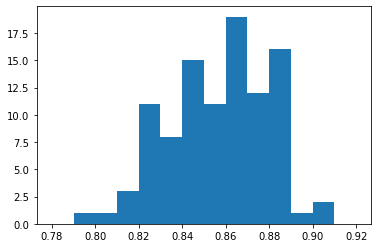

In [144]:
distones = plt.hist(ones,bins=[0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92])
plt.show()

In [170]:
np.save('onesmax', onesmax)

In [129]:
np.save('ttx', otxmax)
np.save('tty', otymax)
np.save('tvx', ovxmax)
np.save('tvy', ovymax)